## Exploring WILDS datasets and models
### FMoW
#### Imports

In [40]:
from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Explore dataset

In [21]:
data = pd.read_csv('/mfsnic/u/apouget/data/fmow_v1.1/rgb_metadata.csv')
display(data.head())

,split,img_filename,img_path,spatial_reference,epsg,category,visible,img_width,img_height,country_code,cloud_cover,timestamp,lat,lon
0,train,tunnel_opening_370_6_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1359,1222,CHN,0,2017-04-12T04:14:15Z,26.604456,101.733373
1,train,tunnel_opening_370_1_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,900,809,CHN,0,2017-01-30T04:18:04Z,26.604456,101.733373
2,train,tunnel_opening_370_0_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1058,951,CHN,1,2015-02-20T04:11:50Z,26.604456,101.733373
3,train,tunnel_opening_370_3_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1568,1409,CHN,11,2015-11-23T04:10:38Z,26.604456,101.733373
4,train,tunnel_opening_370_4_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1624,1460,CHN,0,2016-04-04T04:12:15Z,26.604456,101.733373


In [30]:
data['split'].value_counts()

split
train    363572
seq       53760
test      53473
val       53041
Name: count, dtype: int64

In [33]:
train_categories = sorted(data[data['split'] == 'train']['category'].unique())
val_categories = sorted(data[data['split'] == 'val']['category'].unique())
test_categories = sorted(data[data['split'] == 'test']['category'].unique())

train_categories == val_categories and train_categories == test_categories

True

In [39]:
train_countries = sorted(data[data['split'] == 'train']['country_code'].unique())
val_countries = sorted(data[data['split'] == 'val']['country_code'].unique())
test_countries = sorted(data[data['split'] == 'test']['country_code'].unique())

for cnt in val_countries:
    if cnt not in train_countries:
        print(cnt)
print(' --- ')
for cnt in test_countries:
    if cnt not in train_countries:
        print(cnt)

GRD
IOT
SHN
WSM
 --- 
MDV
MHL
PNG
SHN
VUT


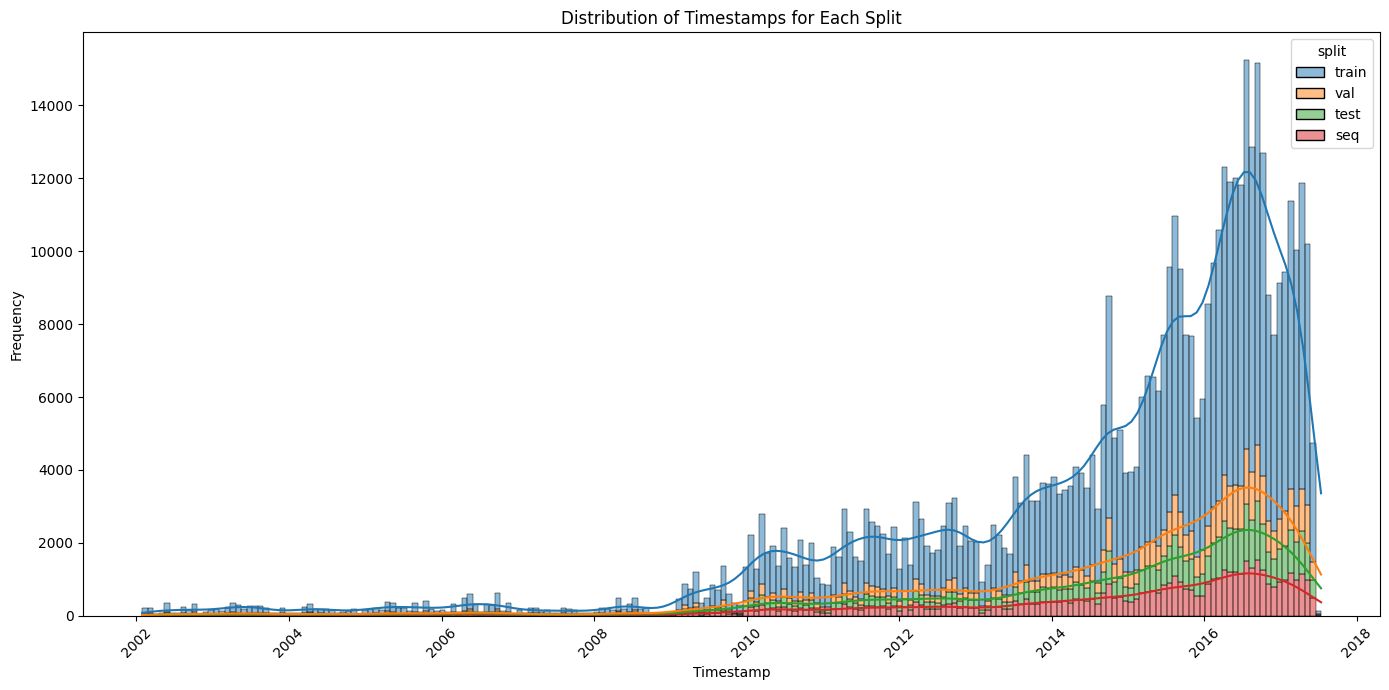

In [42]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = 'ISO8601')

# Create the plot
plt.figure(figsize=(14, 7))
ax = sns.histplot(data=data, x='timestamp', hue='split', multiple='stack', kde=True)

# Customize the plot
plt.title('Distribution of Timestamps for Each Split')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# The legend should be created automatically by seaborn
plt.show()

#### Load dataset

To make the following work, a small change is needed in the `wilds` package code. In `<conda_env>/lib/python3.11/site-packages/wilds/datasets/fmow_dataset.py`, add the `format='ISO8601'` argument to each `pd.to_datetime()` function call (3 in total).

In [44]:
dataset = get_dataset(dataset="fmow", download=False, root_dir='/mfsnic/u/apouget/data/')
train_data = dataset.get_subset(
    "train",
    transform=transforms.Compose(
        [transforms.Resize((448, 448)), transforms.ToTensor()]
    ),
)
train_loader = get_train_loader("standard", train_data, batch_size=16) # get_eval_loader if we don't want to shuffle, "group" to sample from groups
for x, y, metadata in train_loader:
    print(x.shape, y.shape, metadata.shape)
    break

torch.Size([16, 3, 448, 448]) torch.Size([16]) torch.Size([16, 4])


In [46]:
dataset.metadata

,split,img_filename,img_path,spatial_reference,epsg,category,visible,img_width,img_height,country_code,cloud_cover,timestamp,lat,lon,region,y,year
0,train,tunnel_opening_370_6_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1359,1222,CHN,0,2017-04-12T04:14:15Z,26.604456,101.733373,0,57,15.0
1,train,tunnel_opening_370_1_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,900,809,CHN,0,2017-01-30T04:18:04Z,26.604456,101.733373,0,57,15.0
2,train,tunnel_opening_370_0_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1058,951,CHN,1,2015-02-20T04:11:50Z,26.604456,101.733373,0,57,13.0
3,train,tunnel_opening_370_3_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1568,1409,CHN,11,2015-11-23T04:10:38Z,26.604456,101.733373,0,57,13.0
4,train,tunnel_opening_370_4_rgb.jpg,train/tunnel_opening/tunnel_opening_370/tunnel...,GCS_WGS_1984,4326,tunnel_opening,True,1624,1460,CHN,0,2016-04-04T04:12:15Z,26.604456,101.733373,0,57,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523841,seq,burial_site_82_1_rgb.jpg,seq/0010209/0010209_1_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,832,507,NLD,1,2013-05-28T11:22:02Z,52.646049,5.035879,1,8,11.0
523842,seq,burial_site_150_0_rgb.jpg,seq/0004147/0004147_0_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,875,716,JPN,0,2015-03-31T01:47:42Z,35.423879,139.378550,0,8,13.0
523843,seq,burial_site_150_2_rgb.jpg,seq/0004147/0004147_2_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,973,797,JPN,4,2016-01-13T01:28:04Z,35.423879,139.378550,0,8,14.0
523844,seq,burial_site_127_6_rgb.jpg,seq/0007058/0007058_6_rgb.jpg,GCS_WGS_1984,4326,burial_site,True,678,443,FRA,20,2009-10-27T10:47:30Z,49.347681,6.135579,1,8,7.0
